In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Declaro las variables relacionadas a los requerimientos de diseño de los filtros

In [9]:
fs = 44100
fc = 2250
win = 'blackman'
delta_w = 75
delta_w = np.pi*(delta_w/(fs/2))
n_taps = 12*np.pi//delta_w
print(n_taps)

3528.0


Diseño los filtros

In [10]:
h1 = signal.firwin(np.int(n_taps),fc,window='blackman',fs=fs) #pasa-bajos
h2 = signal.firwin(np.int(n_taps+1),fc,window='blackman',pass_zero=False,fs=fs) #pasa-altos

Grafico las respuestas en frecuencia

(-30, 5)

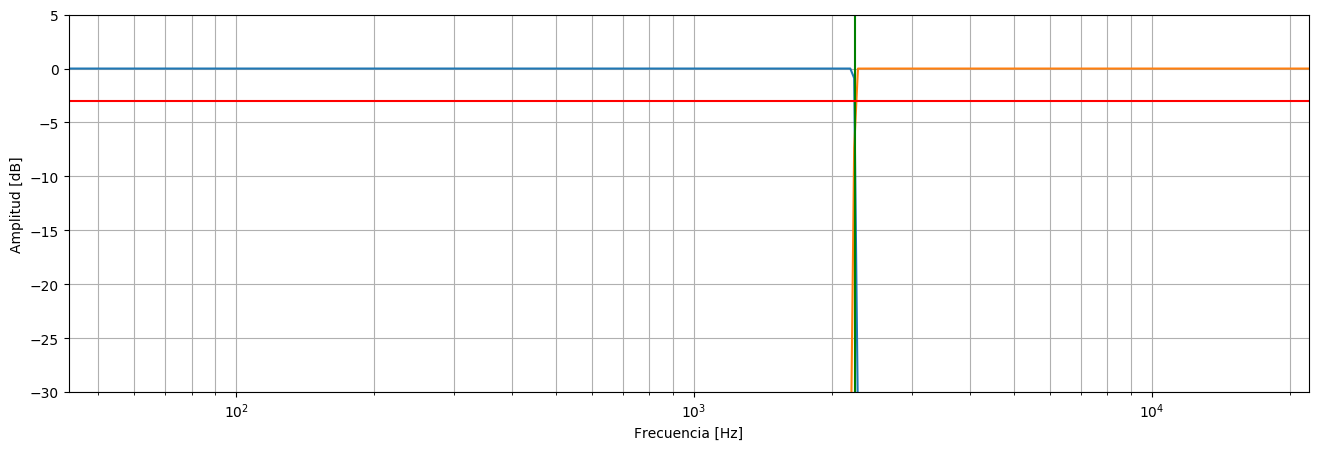

In [11]:
w1, b1 = signal.freqz(h1,fs=fs)
w2, b2 = signal.freqz(h2,fs=fs)
plt.figure(figsize=(16,5), dpi=100)
plt.semilogx(w1, 10 * np.log10(abs(b1)))
plt.semilogx(w2, 10 * np.log10(abs(b2)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') 
plt.axhline(-3, color='red') 
plt.ylim((-30,5))

Calculo el retardo de grupo de cada filtro

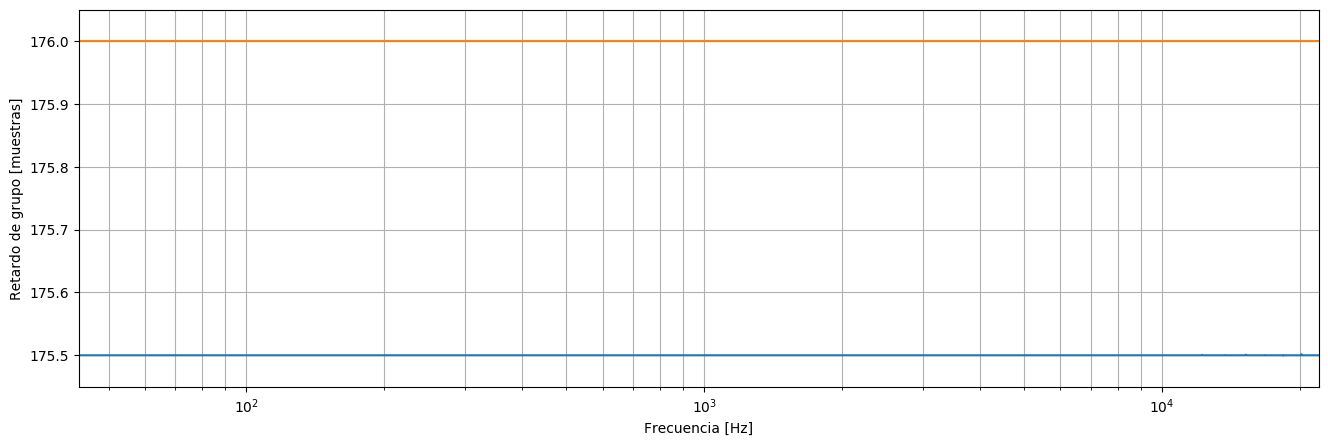

In [6]:
w11,gd1 = signal.group_delay((h1,1),fs=fs)
w21,gd2 = signal.group_delay((h2,1),fs=fs)
plt.figure(figsize=(16,5), dpi=100)
plt.semilogx(w11, gd1)
plt.semilogx(w21, gd2)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Retardo de grupo [muestras]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

Grafico el sistema total

(-5, 5)

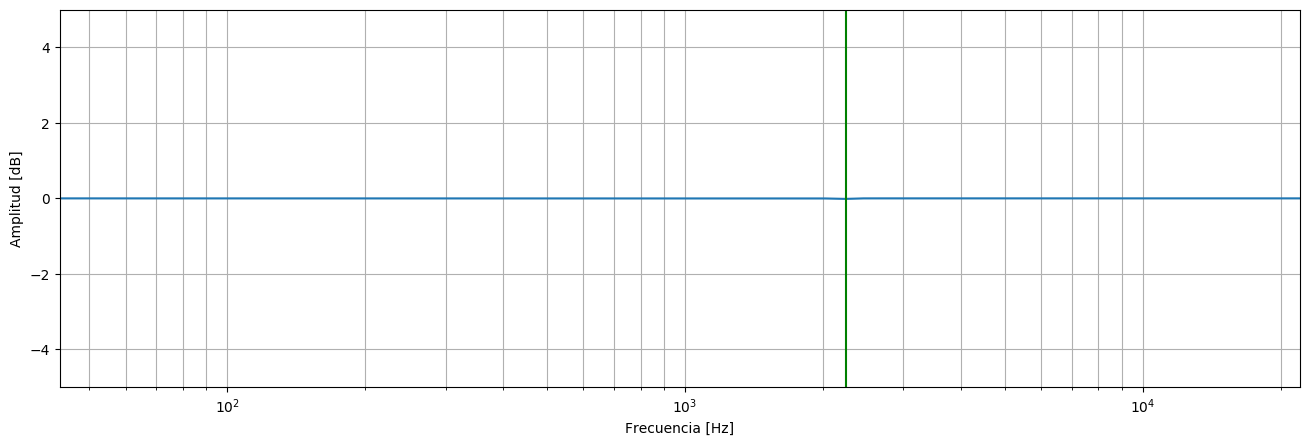

In [7]:
plt.figure(figsize=(16,5), dpi=100)
plt.semilogx(w1, 10 * np.log10(abs(b1+b2)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') 
plt.ylim((-5,5))